## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# load the data
df = pd.read_csv('Bank churners.csv')
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124  

## Preprocess the data

In [3]:
# check whether this data contains null / categorical value
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

## Dropping the unwanted column to avoid space consumption nd confusion

In [11]:
# Drop unnecessary columns
columns_to_drop = [
    'CLIENTNUM'
]
df_cleaned = df.drop(columns=columns_to_drop)

In [12]:
df_cleaned

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

In [13]:
## Check all column in dataset are ok to proceed ,if not any different format like categorical /fractions etc..change everthing to int/float format

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder
categorical_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
label_encoders = {}
for col in categorical_columns:
    label = LabelEncoder()
    df_cleaned[col] = label.fit_transform(df_cleaned[col])
    label_encoders[col] = label  # Store the encoder for later use if needed


In [17]:
 label

LabelEncoder()

In [18]:
# Scale numerical variables using StandardScaler
from sklearn.preprocessing import StandardScaler
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])


In [20]:
df_cleaned

Attrition_Flag  Customer_Age    Gender  Dependent_count  \
0            0.437506     -0.165406  1.059956         0.503368   
1            0.437506      0.333570 -0.943436         2.043199   
2            0.437506      0.583058  1.059956         0.503368   
3            0.437506     -0.789126 -0.943436         1.273283   
4            0.437506     -0.789126  1.059956         0.503368   
...               ...           ...       ...              ...   
10122        0.437506      0.458314  1.059956        -0.266547   
10123       -2.285681     -0.664382  1.059956        -0.266547   
10124       -2.285681     -0.290150 -0.943436        -1.036462   
10125       -2.285681     -2.036565  1.059956        -0.266547   
10126       -2.285681     -0.414894 -0.943436        -0.266547   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
0            -0.052637       -0.628128        -0.574182      -0.259473   
1            -0.597678        0.727306         0.755053      -0.259473   
2            -0.597678       -0.628128         0.090436      -0.259473   
3            -0.052637        2.082739         0.755053      -0.259473   
4             1.037447       -0.628128        -0.574182      -0.259473   
...                ...             ...              ...            ...   
10122        -0.597678        0.727306        -1.238799      -0.259473   
10123         1.582489       -1.983561        -1.238799      -0.259473   
10124        -0.052637       -0.628128         0.755053      -0.259473   
10125        -0.597678        2.082739        -1.238799      -0.259473   
10126        -0.597678       -0.628128         0.755053       4.069499   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0            0.384621                  0.763943               -1.327136   
1            1.010715                  1.407306               -1.327136   
2            0.008965                  0.120579               -1.327136   
3           -0.241473                 -0.522785                1.641478   
4           -1.869317                  0.763943               -1.327136   
...               ...                       ...                     ...   
10122        0.509840                 -0.522785               -0.337598   
10123       -1.368442                  0.120579               -0.337598   
10124        0.008965                  0.763943                0.651940   
10125        0.008965                  0.120579                0.651940   
10126       -1.368442                  1.407306               -0.337598   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
3                  -1.315636     -0.585251             1.661686   
4                  -2.219655     -0.430877            -1.426858   
...                      ...           ...                  ...   
10122               0.492404     -0.509330             0.844455   
10123               0.492404     -0.479181             1.255524   
10124               1.396424     -0.354626            -1.426858   
10125               0.492404     -0.368710            -1.426858   
10126               1.396424      0.193220             0.979433   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             0.488971              2.623494        -0.959707       -0.973895   
1            -0.008486              3.563293        -0.916433       -1.357340   
2            -0.445658              8.367214        -0.740982       -1.911206   
3            -0.734100              2.942843        -0.951758       -1.911206   
4            -0.302868              6.455682        -1.056263       -1.570365   
...                ...                   ...              ...             ...   
10122        -0.584929             -0.259771        

In [24]:
df_cleaned.info()
#Now its showing Only int nd float values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  float64
 1   Customer_Age              10127 non-null  float64
 2   Gender                    10127 non-null  float64
 3   Dependent_count           10127 non-null  float64
 4   Education_Level           10127 non-null  float64
 5   Marital_Status            10127 non-null  float64
 6   Income_Category           10127 non-null  float64
 7   Card_Category             10127 non-null  float64
 8   Months_on_book            10127 non-null  float64
 9   Total_Relationship_Count  10127 non-null  float64
 10  Months_Inactive_12_mon    10127 non-null  float64
 11  Contacts_Count_12_mon     10127 non-null  float64
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  float64
 14  Avg_Op

In [26]:
df_cleaned.describe()
# provides a summary of statistical measures for the numerical columns in the dataset to check outliers

Attrition_Flag  Customer_Age        Gender  Dependent_count  \
count    1.012700e+04  1.012700e+04  1.012700e+04     1.012700e+04   
mean     1.403264e-17  1.333101e-16  6.735667e-17    -7.577626e-17   
std      1.000049e+00  1.000049e+00  1.000049e+00     1.000049e+00   
min     -2.285681e+00 -2.535541e+00 -9.434357e-01    -1.806378e+00   
25%      4.375063e-01 -6.643815e-01 -9.434357e-01    -1.036462e+00   
50%      4.375063e-01 -4.066159e-02 -9.434357e-01    -2.665471e-01   
75%      4.375063e-01  7.078024e-01  1.059956e+00     5.033681e-01   
max      4.375063e-01  3.327426e+00  1.059956e+00     2.043199e+00   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
count     1.012700e+04    1.012700e+04     1.012700e+04   10127.000000   
mean      2.385549e-17    5.893709e-17    -2.525875e-17       0.000000   
std       1.000049e+00    1.000049e+00     1.000049e+00       1.000049   
min      -1.687762e+00   -1.983561e+00    -1.903416e+00      -0.259473   
25%      -5.976783e-01   -6.281276e-01    -5.741815e-01      -0.259473   
50%      -5.263660e-02   -6.281276e-01     9.043572e-02      -0.259473   
75%       1.037447e+00    7.273056e-01     7.550529e-01      -0.259473   
max       1.582489e+00    2.082739e+00     1.419670e+00       4.069499   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count    1.012700e+04              1.012700e+04            1.012700e+04   
mean    -3.381866e-16             -4.490445e-17            1.613754e-16   
std      1.000049e+00              1.000049e+00            1.000049e+00   
min     -2.871068e+00             -1.809512e+00           -2.316674e+00   
25%     -6.171294e-01             -5.227845e-01           -3.375979e-01   
50%      8.964513e-03              1.205790e-01           -3.375979e-01   
75%      5.098397e-01              7.639426e-01            6.519402e-01   
max      2.513340e+00              1.407306e+00            3.620555e+00   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           1.012700e+04  1.012700e+04         1.012700e+04   
mean           -7.858279e-17  1.347133e-16        -7.016320e-17   
std             1.000049e+00  1.000049e+00         1.000049e+00   
min            -2.219655e+00 -7.915266e-01        -1.426858e+00   
25%            -4.116160e-01 -6.686548e-01        -9.863389e-01   
50%            -4.116160e-01 -4.492525e-01         1.388875e-01   
75%             4.924038e-01  2.679862e-01         7.622408e-01   
max             3.204463e+00  2.848054e+00         1.661686e+00   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     1.012700e+04          1.012700e+04     1.012700e+04    1.012700e+04   
mean      4.490445e-17          3.830911e-16    -8.980890e-17   -2.245222e-16   
std       1.000049e+00          1.000049e+00     1.000049e+00    1.000049e+00   
min      -8.213361e-01         -3.466947e+00    -1.146344e+00   -2.337256e+00   
25%      -6.759604e-01         -5.882438e-01    -6.619405e-01   -8.460801e-01   
50%      -4.394979e-01         -1.092203e-01    -1.486877e-01    9.123036e-02   
75%       2.629041e-01          4.519214e-01     9.918090e-02    6.877007e-01   
max       2.975375e+00          1.203060e+01     4.144855e+00    3.158792e+00   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         1.012700e+04           1.012700e+04  
mean         -3.115246e-16          -7.296973e-17  
std           1.000049e+00           1.000049e+00  
min          -2.991597e+00          -9.971550e-01  
25%          -5.469820e-01          -9.137243e-01  
50%          -4.293775e-02          -3.587287e-01  
75%           4.443050e-01           8.274384e-01  
max           1.260857e+01           2.626640e+00

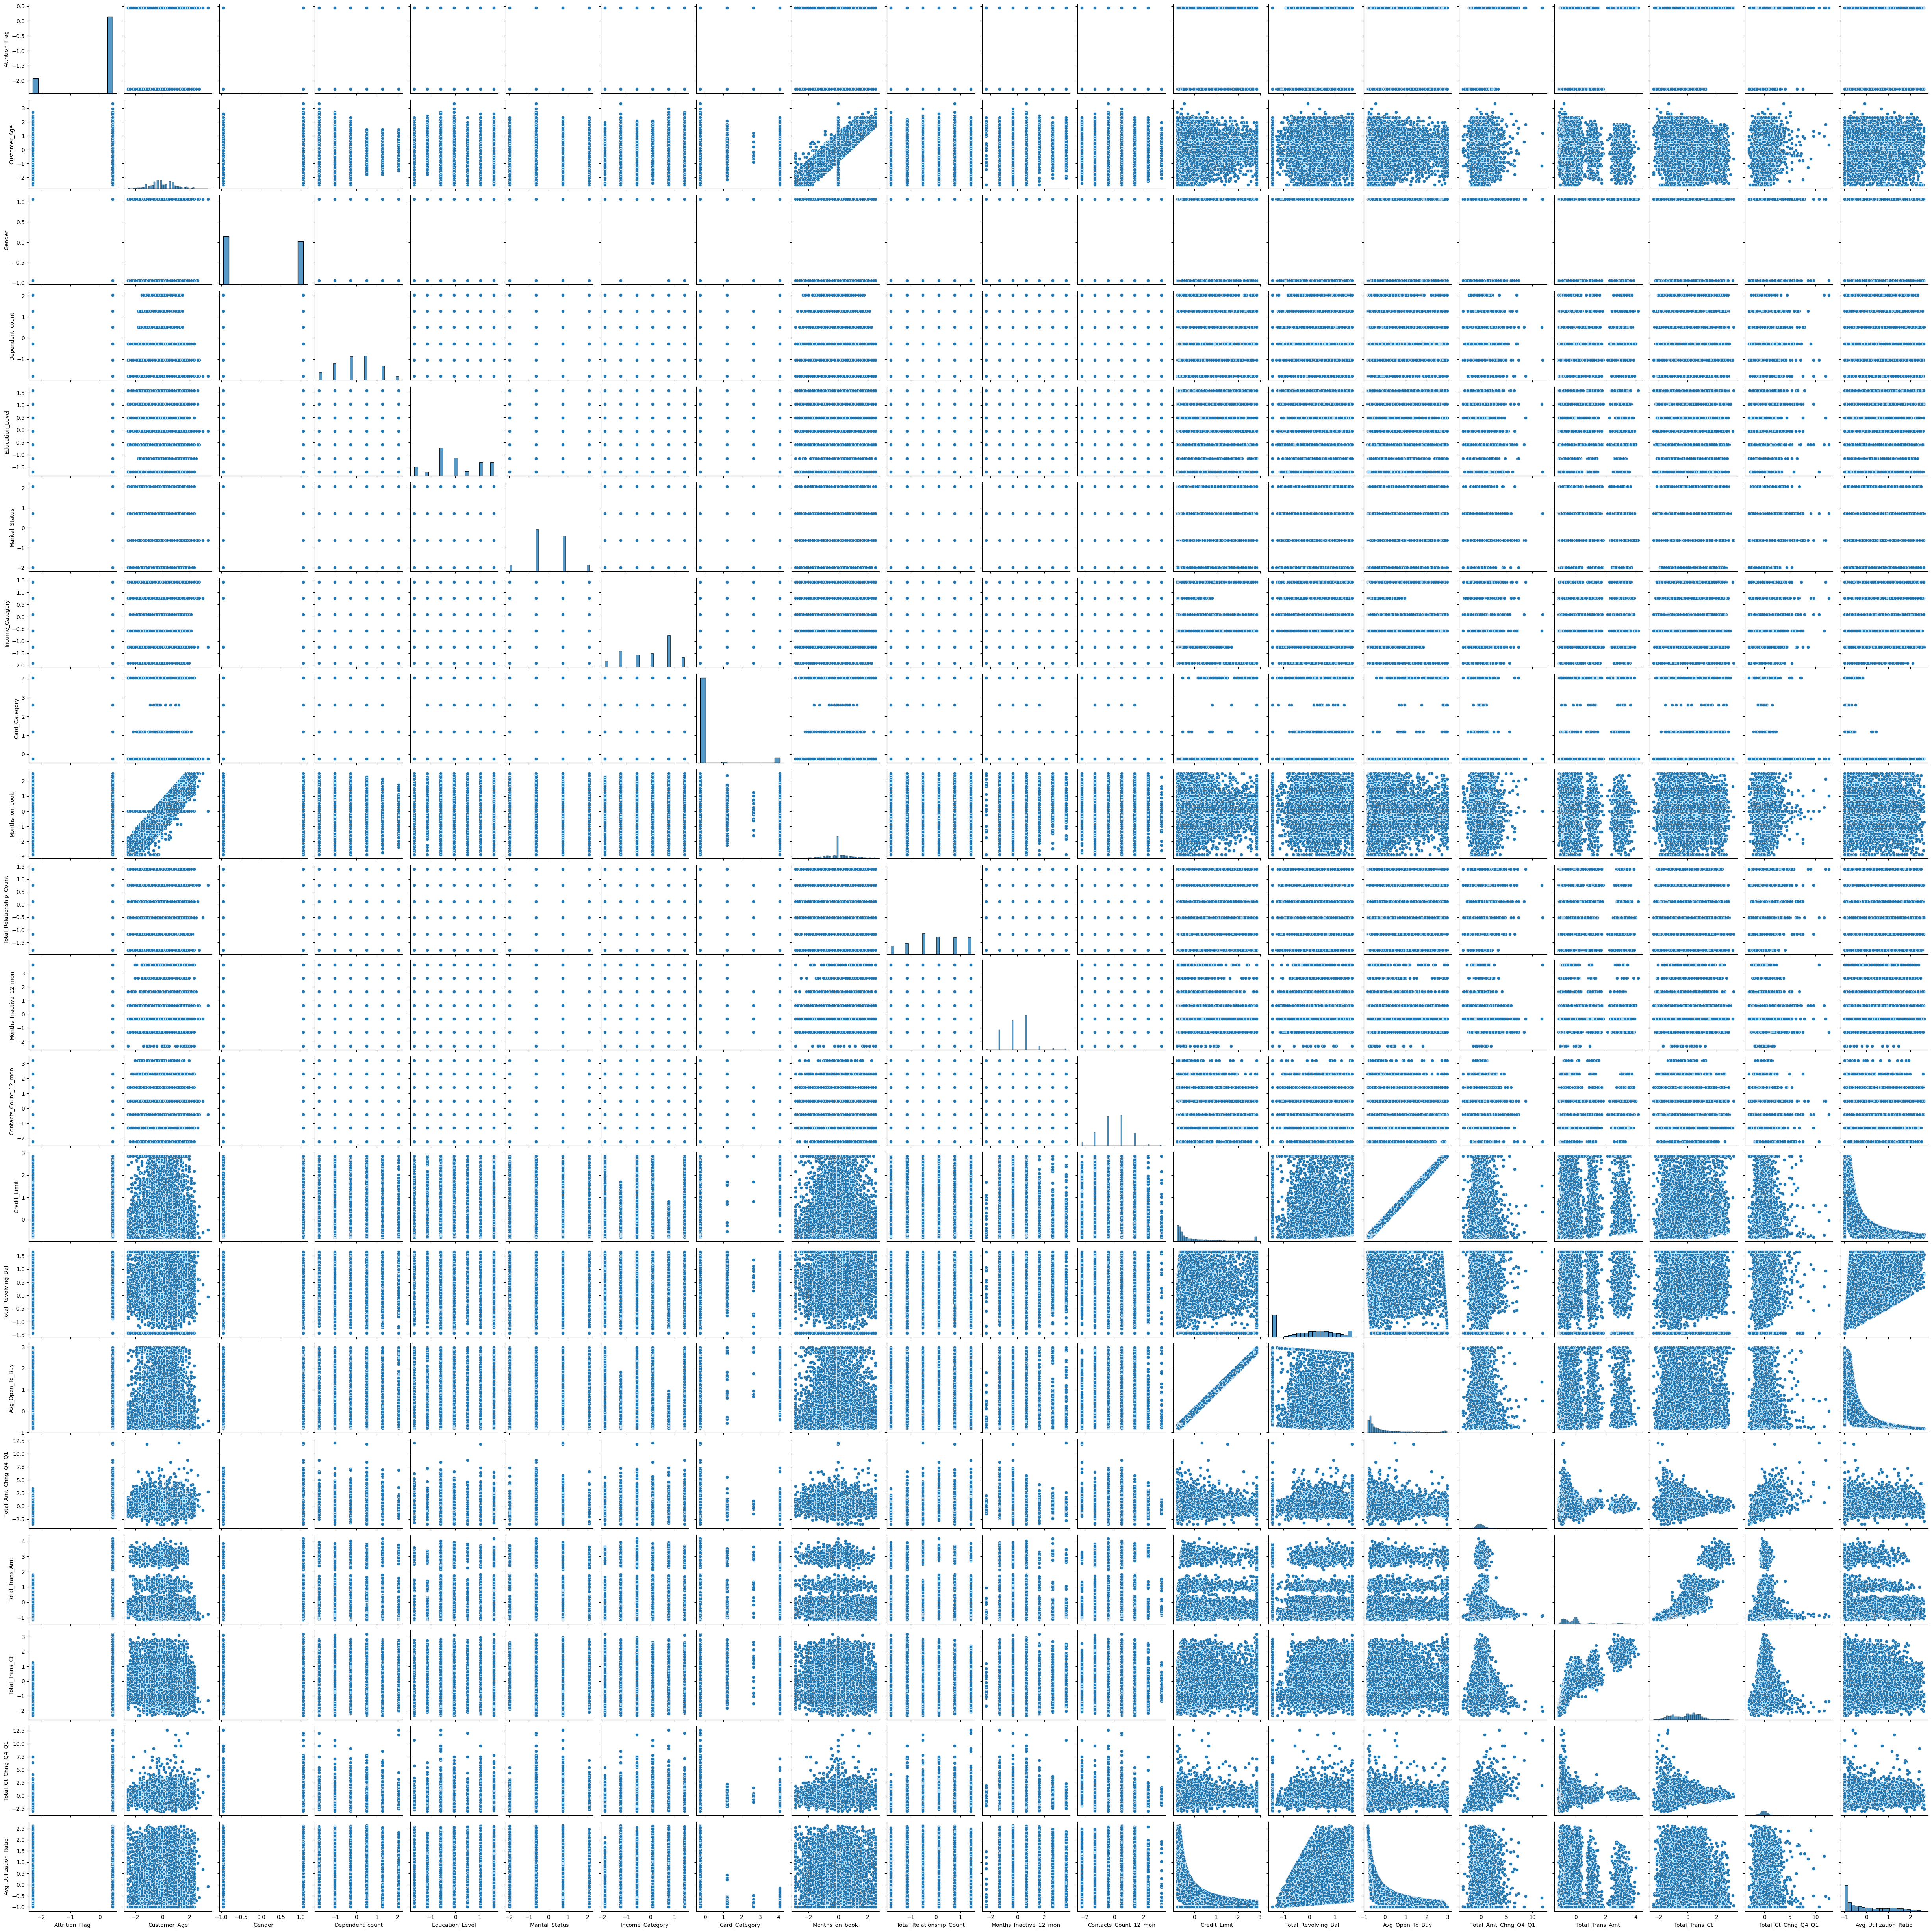

In [28]:
import seaborn as sns
sns.pairplot(df_cleaned)

## Standarization Process

In [29]:
df_cleaned.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [30]:
df_cleaned.shape

(10127, 20)

## Saving the Preprocessed dataset into New dataset in csv format

In [32]:
df_cleaned.to_csv('Preprocess_Bank_churners.csv',index = False)

In [34]:
df1 = pd.read_csv('Preprocess_Bank_churners.csv')
df1

Attrition_Flag  Customer_Age    Gender  Dependent_count  \
0            0.437506     -0.165406  1.059956         0.503368   
1            0.437506      0.333570 -0.943436         2.043199   
2            0.437506      0.583058  1.059956         0.503368   
3            0.437506     -0.789126 -0.943436         1.273283   
4            0.437506     -0.789126  1.059956         0.503368   
...               ...           ...       ...              ...   
10122        0.437506      0.458314  1.059956        -0.266547   
10123       -2.285681     -0.664382  1.059956        -0.266547   
10124       -2.285681     -0.290150 -0.943436        -1.036462   
10125       -2.285681     -2.036565  1.059956        -0.266547   
10126       -2.285681     -0.414894 -0.943436        -0.266547   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
0            -0.052637       -0.628128        -0.574182      -0.259473   
1            -0.597678        0.727306         0.755053      -0.259473   
2            -0.597678       -0.628128         0.090436      -0.259473   
3            -0.052637        2.082739         0.755053      -0.259473   
4             1.037447       -0.628128        -0.574182      -0.259473   
...                ...             ...              ...            ...   
10122        -0.597678        0.727306        -1.238799      -0.259473   
10123         1.582489       -1.983561        -1.238799      -0.259473   
10124        -0.052637       -0.628128         0.755053      -0.259473   
10125        -0.597678        2.082739        -1.238799      -0.259473   
10126        -0.597678       -0.628128         0.755053       4.069499   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0            0.384621                  0.763943               -1.327136   
1            1.010715                  1.407306               -1.327136   
2            0.008965                  0.120579               -1.327136   
3           -0.241473                 -0.522785                1.641478   
4           -1.869317                  0.763943               -1.327136   
...               ...                       ...                     ...   
10122        0.509840                 -0.522785               -0.337598   
10123       -1.368442                  0.120579               -0.337598   
10124        0.008965                  0.763943                0.651940   
10125        0.008965                  0.120579                0.651940   
10126       -1.368442                  1.407306               -0.337598   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
3                  -1.315636     -0.585251             1.661686   
4                  -2.219655     -0.430877            -1.426858   
...                      ...           ...                  ...   
10122               0.492404     -0.509330             0.844455   
10123               0.492404     -0.479181             1.255524   
10124               1.396424     -0.354626            -1.426858   
10125               0.492404     -0.368710            -1.426858   
10126               1.396424      0.193220             0.979433   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             0.488971              2.623494        -0.959707       -0.973895   
1            -0.008486              3.563293        -0.916433       -1.357340   
2            -0.445658              8.367214        -0.740982       -1.911206   
3            -0.734100              2.942843        -0.951758       -1.911206   
4            -0.302868              6.455682        -1.056263       -1.570365   
...                ...                   ...              ...             ...   
10122        -0.584929             -0.259771        